# Task №2
1. Develop yourself using numpy library: 

    a) a function to implement stochastic gradient descent (SGD) algorithm 
    
    b) Adam's optimization algorithm for a function of two variables f(x,y).
    
    
2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).

3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def contour_plot(x_seq,y_seq, x1):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    
    plt.plot(x_seq[:-1],y_seq[:-1],'rx')
    
    plt.plot(x_seq[-1],y_seq[-1],'bo')
    plt.show()

## Function defenition

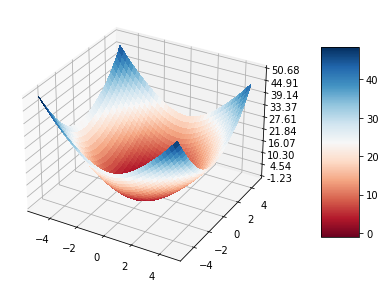

In [2]:
def f(x, y):
    return x**2 - np.cos(x) + y**2 + np.sin(y)

def dx(x, y):
    return np.array([2*x + np.sin(x), 0])

def dy(x, y):
    return np.array([0, 2*y + np.cos(y)])

def grad(x, y):
    return dx(x,y) + dy(x,y)

#plot function
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

fig = plt.figure(1, figsize = (15, 5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

# Stochastic Gradient Descen

In [3]:
def stochastic_gradient():
    return random.choice([dx,dy])

def sgd(grad, init_x=np.array([0, 0]), learn_rate=1, epsilon=0.0001):
    seq_x = []
    seq_y = []
    
    n_iters = 0
    x_next = init_x
    
    err = np.inf
    while err > epsilon: 
        x_prev = x_next
        
        df = stochastic_gradient()
        x_next = x_prev - learn_rate*df(x_prev[0],x_prev[1])
        n_iters += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
        
        err = np.linalg.norm(np.subtract(x_next,x_prev))
    
    return (x_next, n_iters, seq_x, seq_y)

init_x = np.array([1, 1])
sdg_res = sgd(stochastic_gradient, init_x, 0.05)

Minimum (x,y) from stochastic gradient descent: [ 0.00049888 -0.44479277]
Number of stochastic gradient descent iterations: 93


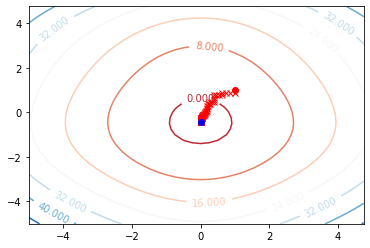

In [4]:
print('Minimum (x,y) from stochastic gradient descent: %s' %sdg_res[0])
print('Number of stochastic gradient descent iterations: %s' %sdg_res[1])

contour_plot(sdg_res[2], sdg_res[3], init_x)

# Adam optimization algorithm
[Adam, 2017](https://arxiv.org/pdf/1412.6980.pdf)

In [5]:
def adam(grad, init_x=np.array([0, 0]), learn_rate=1, epsilon=0.0001, beta_1=0.9, beta_2=0.999, e=1e-8):
    seq_x = []
    seq_y = []
    
    n_iters = 0
    x_next = init_x
    m = np.array([0, 0])
    v = np.array([0, 0])
    m_cap = np.array([0, 0])
    v_cap = np.array([0, 0])
    
    err = np.inf
    while err > epsilon:
        n_iters += 1

        x_prev = x_next 
        
        g = grad(*x_prev)
        m = beta_1 * m + (1 - beta_1)*g
        v = beta_2 * v + (1 - beta_2)*g**2
        m_cap = m / (1 - beta_1**n_iters)
        v_cap = v / (1 - beta_2**n_iters)
        
        x_next = x_prev - learn_rate * m_cap / (np.sqrt(v_cap) + e)
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
        
        err = np.linalg.norm(np.subtract(x_next,x_prev))
    
    return (x_next, n_iters, seq_x, seq_y)

init_x = np.array([1, 1])
adam_res = adam(grad, init_x, 0.05)

Minimum (x,y) from adam optimization algorithm: [-0.00076915 -0.44911556]
Number of adam optimization algorithm iterations: 135


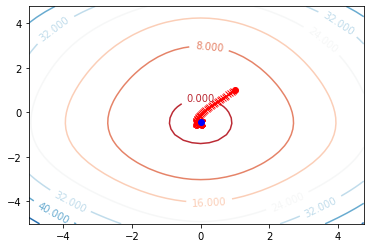

In [6]:
print('Minimum (x,y) from adam optimization algorithm: %s' %adam_res[0])
print('Number of adam optimization algorithm iterations: %s' %adam_res[1])

contour_plot(adam_res[2], adam_res[3], init_x)

# Step 3: optimization steps
#### x_next - x_prev of n_iter

In [7]:
def plot_optimization_steps(sdg_res, adam_res):
    _, _, x1, x2 = sdg_res
    
    sgd_steps = []
    for i in range(1, len(x1)):
        x_prev = np.array([x1[i-1], x2[i-1]])
        x_next = np.array([x1[i], x2[i]])
        sgd_steps.append( np.linalg.norm(np.subtract(x_next,x_prev)) )
    
    sgd_x = range(1, len(x1))
    
    _, _, x1, x2 = adam_res
    
    adam_steps = []
    for i in range(1, len(x1)):
        x_prev = np.array([x1[i-1], x2[i-1]])
        x_next = np.array([x1[i], x2[i]])
        adam_steps.append( np.linalg.norm(np.subtract(x_next,x_prev)) )
    
    adam_x = range(1, len(x1))
    
    plt.plot(sgd_x, sgd_steps, 'bo')
    plt.plot(adam_x, adam_steps, 'ro')
    
    plt.xlabel("iterations")
    plt.ylabel("x_next - x_prev")
    
    plt.show()

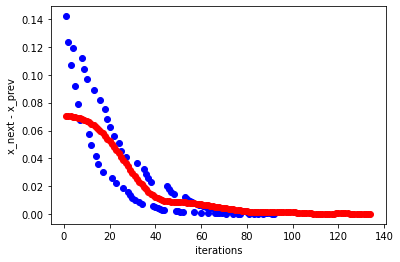

In [8]:
plot_optimization_steps(sdg_res, adam_res)